In [1]:
import pandas as pd 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Feb-19-2024_Mar-17-2024_820974709842777.csv' , delimiter='\t')

In [3]:
df = pd.read_csv('Dec-24-2023_Mar-22-2024_1697294034132138.csv')

In [4]:
df.head()

,Post ID,Page ID,Page name,Title,Description,Duration (secs),Publish time,Caption type,Permalink,Is crosspost,...,Views by country (Fiji (FJ)),Views by country (Algeria (DZ)),Views by country (Bhutan (BT)),Views by country (Afghanistan (AF)),Views by country (Qatar (QA)),Views by country (Spain (ES)),Views by country (Portugal (PT)),Views by country (New Zealand (NZ)),Views by country (Mauritius (MU)),Views by country (Malaysia (MY))
0,122128258814198697,247903501729335,HU.co,NaN,KHAIE\n#khaie #faysalquraishi #hinabayat #uzma...,263,03/14/2024 00:03,auto,https://www.facebook.com/hu.4113/posts/pfbid02...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,122128311284198697,247903501729335,HU.co,NaN,KHAIE\n#khaie #faysalquraishi #hinabayat #uzma...,125,03/14/2024 03:03,NaN,https://www.facebook.com/hu.4113/posts/pfbid0F...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,122128379282198697,247903501729335,HU.co,NaN,KHAIE\n#khaie #faysalquraishi #hinabayat #uzma...,218,03/14/2024 05:03,NaN,https://www.facebook.com/hu.4113/posts/pfbid0R...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,122128399352198697,247903501729335,HU.co,NaN,KHAIE Coming Episode Promo \n#khaie #faysalqur...,50,03/14/2024 07:03,NaN,https://www.facebook.com/hu.4113/posts/pfbid0r...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1068188127590585,247903501729335,HU.co,NaN,"Like, Follow & Share.\n\n#islamic #islamdaily ...",34,03/14/2024 19:03,NaN,https://www.facebook.com/reel/1068188127590585/,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 96 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Post ID                                       122 non-null    int64  
 1   Page ID                                       122 non-null    int64  
 2   Page name                                     122 non-null    object 
 3   Title                                         0 non-null      float64
 4   Description                                   121 non-null    object 
 5   Duration (secs)                               122 non-null    int64  
 6   Publish time                                  122 non-null    object 
 7   Caption type                                  15 non-null     object 
 8   Permalink                                     122 non-null    object 
 9   Is crosspost                                  122 non-null    int

In [7]:
# df['Duration (secs)'].value_counts()

In [8]:
df[['Publish time', 'Duration (secs)']].head()

,Publish time,Duration (secs)
0,03/14/2024 00:03,263
1,03/14/2024 03:03,125
2,03/14/2024 05:03,218
3,03/14/2024 07:03,50
4,03/14/2024 19:03,34


In [9]:
df['Publish time'] = pd.to_datetime(df['Publish time'])

In [10]:
len(df)

122

In [11]:
# Group by hour and calculate maximum duration
df['Hour'] = df['Publish time'].dt.hour
max_duration_by_hour = df.groupby('Hour')['Duration (secs)'].max()

In [12]:
df[['Publish time', 'Hour']].head()

,Publish time,Hour
0,2024-03-14 00:03:00,0
1,2024-03-14 03:03:00,3
2,2024-03-14 05:03:00,5
3,2024-03-14 07:03:00,7
4,2024-03-14 19:03:00,19


In [13]:
df['Date'] = df['Publish time'].dt.date
df['Day'] = df['Publish time'].dt.day
df['Month'] = df['Publish time'].dt.month

In [14]:
# Rename a single column
df.rename(columns={'Date': 'Full_Date'}, inplace=True)

In [15]:
# Rename a single column
df.rename(columns={'Day': 'Date'}, inplace=True)

In [16]:
df.loc[
    df['Views by top audience (65+, F)'].notna(), 'Views by top audience (65+, F)'
]

29    3.0
31    2.0
44    0.0
45    0.0
50    3.0
61    3.0
85    1.0
86    3.0
87    5.0
Name: Views by top audience (65+, F), dtype: float64

In [17]:
# df[['Permalink', 'Post type','Data comment','Publish time', 'Full_Date', 'Hour', 'Date', 'Month', ', 'Engagements', 'Impressions','Duration (secs)', 'Likes', 'Shares', 'Reels plays']].head()

In [18]:
# df.columns.to_list()

In [19]:
df['Post type'].value_counts()

Video      90
FB reel    29
Photo       3
Name: Post type, dtype: int64

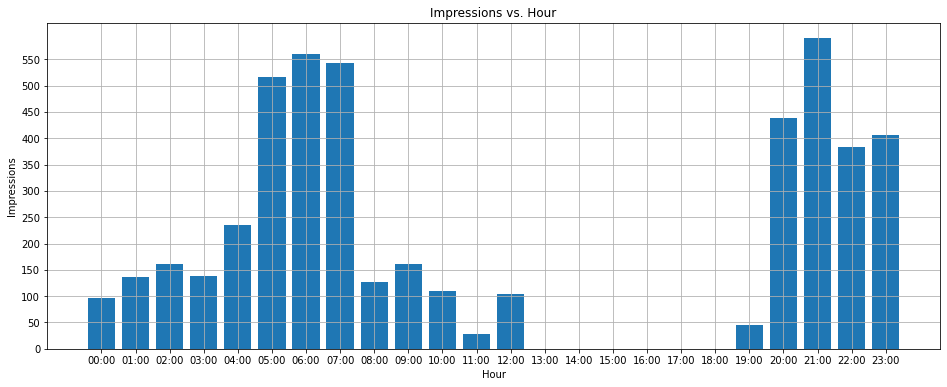

In [20]:
# Assuming df['Hour'] contains values from 0 to 23
plt.figure(figsize=(16, 6))  # Adjust width and height as needed
plt.bar(df['Hour'], df['Impressions'])
plt.xlabel('Hour')
plt.ylabel('Impressions')
plt.title('Impressions vs. Hour')

# Set custom x-axis tick labels
plt.xticks(range(24), [f"{hour:02}:00" for hour in range(24)])  # Format as HH:00
# plt.xticks(range(0, 24, 2), [f"{hour:02}:00" for hour in range(0, 24, 2)])

# Set custom y-axis ticks (every 50)
plt.yticks(range(0, max(df['Impressions']) + 1, 50))

# Show the plot
plt.grid(True)
plt.show()


### Task 
###### Engagment vs time 
###### Day base engagment if days available in data or can specify by itself
###### likes and views
##### views on time basis 

### Engagment Vs Time 

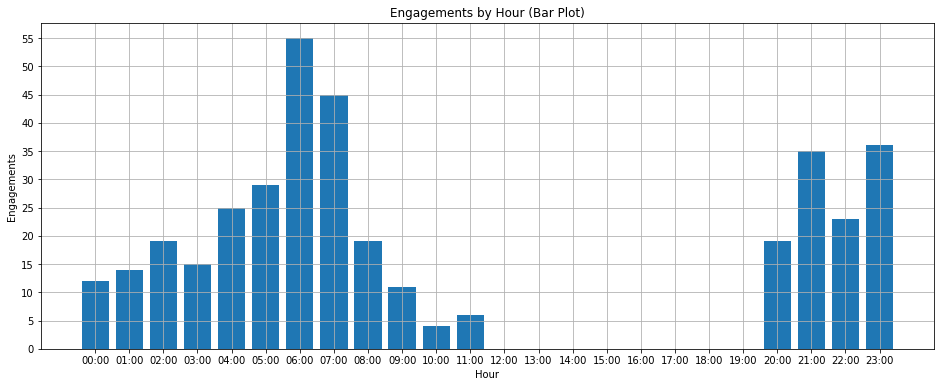

In [21]:
plt.figure(figsize=(16, 6))

# Create a bar plot
plt.bar(df['Hour'], df['Engagements'])

plt.xlabel('Hour')
plt.ylabel('Engagements')
plt.title('Engagements by Hour (Bar Plot)')

# Set custom x-axis tick labels
# plt.xticks(range(0, 24, 2), [f"{hour:02}:00" for hour in range(0, 24, 2)]) # for hour with the difference of 2 
plt.xticks(range(0, 24), [f"{hour:02}:00" for hour in range(0, 24)])

# Set custom y-axis ticks (every 5)
max_engagements = int(max(df['Engagements']))
plt.yticks(range(0, max_engagements + 1, 5))

# Show the plot
plt.grid(True)
plt.show()

In [22]:
df['Engagements'].max()

55.0

###  To Get the weekDays Name 

In [23]:
# Convert the 'Date' column to pandas datetime
df['Full_Date'] = pd.to_datetime(df['Full_Date'], errors='coerce')

# Get the day of the week (Monday, Tuesday, etc.)
df['DayOfWeek'] = df['Full_Date'].dt.day_name()

In [24]:
df[['Full_Date', 'DayOfWeek']].head()

,Full_Date,DayOfWeek
0,2024-03-14,Thursday
1,2024-03-14,Thursday
2,2024-03-14,Thursday
3,2024-03-14,Thursday
4,2024-03-14,Thursday


In [25]:
df['DayOfWeek'].value_counts()

Wednesday    23
Thursday     22
Tuesday      21
Saturday     16
Monday       14
Friday       13
Sunday       13
Name: DayOfWeek, dtype: int64

### Performance On Basis Of Weekdays

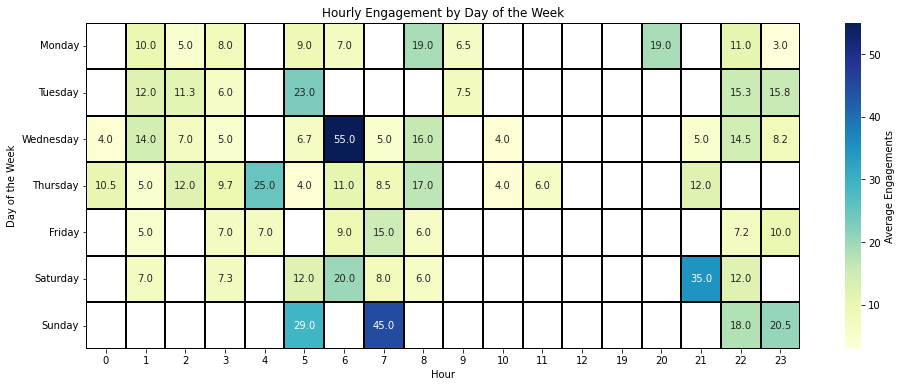

In [26]:
# Group by hour and day of the week, calculate the mean engagement
hourly_engagement = df.groupby(['Hour', 'DayOfWeek'])['Engagements'].mean().reset_index()

# Pivot the data to create a heatmap
heatmap_data = hourly_engagement.pivot(index='DayOfWeek', columns='Hour', values='Engagements')

# Set the order of weekdays for better visualization
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(index=weekday_order)

# Create the heatmap with added boundary
plt.figure(figsize=(16, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.1f', cbar_kws={'label': 'Average Engagements'},
            linewidths=2, linecolor='black')  # Adjust linewidths and linecolor here
plt.title('Hourly Engagement by Day of the Week')
plt.xlabel('Hour')
plt.ylabel('Day of the Week')
plt.show()

In [27]:
df['Engagements'].mean()

11.505376344086022

##  Instagram EDA

In [30]:
df_insta = pd.read_csv('insta_data.csv')

In [32]:
len(df_insta)

15

In [50]:
df_insta['Publish time'][1:4]

1   2024-02-23 22:02:00
2   2024-03-09 12:03:00
3   2024-03-13 07:03:00
Name: Publish time, dtype: datetime64[ns]

In [43]:
df_insta['Publish time'] = pd.to_datetime(df_insta['Publish time'])

In [54]:
df_insta['Date'] = df_insta['Publish time'].dt.date
df_insta['Day'] = df_insta['Publish time'].dt.day
df_insta['Month'] = df_insta['Publish time'].dt.month
df_insta['DayOfWeek'] = df_insta['Publish time'].dt.day_name()
df_insta['Hour'] = df_insta['Publish time'].dt.hour

In [55]:
df_insta[['Publish time', 'Day', 'Month', 'DayOfWeek', 'Hour']].head()

,Publish time,Day,Month,DayOfWeek,Hour
0,2024-02-21 05:02:00,21,2,Wednesday,5
1,2024-02-23 22:02:00,23,2,Friday,22
2,2024-03-09 12:03:00,9,3,Saturday,12
3,2024-03-13 07:03:00,13,3,Wednesday,7
4,2024-03-14 03:03:00,14,3,Thursday,3


In [56]:
df_insta.head(2)

,Post ID,Account ID,Account username,Account name,Description,Duration (secs),Publish time,Permalink,Post type,Data comment,Date,Impressions,Reach,Shares,Follows,Plays,Likes,Comments,Saves,Day,Month,DayOfWeek,Hour
0,18035715169751658,17841465176534235,hu4113.co,Hu.co,#reels #reelsinsta#reelsinstagramreels #reelsv...,27,2024-02-21 05:02:00,https://www.instagram.com/reel/C3nK6nQIGSD/,IG reel,NaN,2024-02-21,5,4,0,0,5,3,0,0,21,2,Wednesday,5
1,18022114208008141,17841465176534235,hu4113.co,Hu.co,#reelitfeelit #tiktok #trending #explore #inst...,5,2024-02-23 22:02:00,https://www.instagram.com/reel/C3uDDU_BtG7/,IG reel,NaN,2024-02-23,3,1,0,0,3,1,0,0,23,2,Friday,22


In [52]:
df_insta['Post type'].value_counts()

IG reel     14
IG image     1
Name: Post type, dtype: int64

In [64]:
df_insta[['Hour', 'Impressions', 'Reach', 'Shares', 'Likes']].head()

,Hour,Impressions,Reach,Shares,Likes
0,5,5,4,0,3
1,22,3,1,0,1
2,12,48,46,0,3
3,7,323,316,1,42
4,3,1,1,0,1


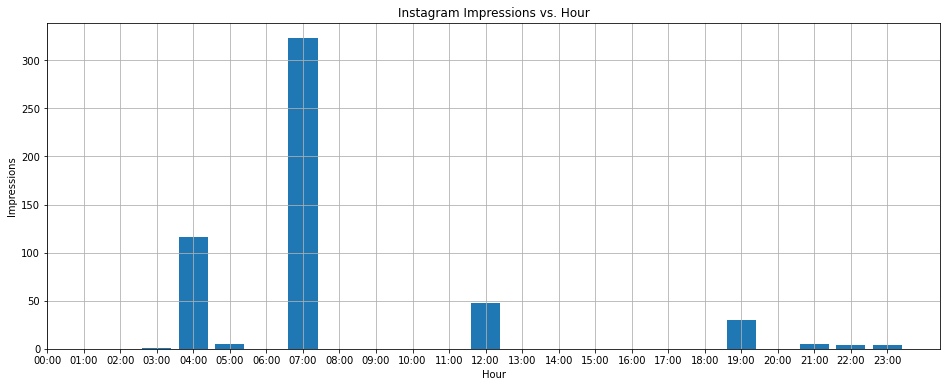

In [62]:
# Assuming df['Hour'] contains values from 0 to 23
plt.figure(figsize=(16, 6))  # Adjust width and height as needed
plt.bar(df_insta['Hour'], df_insta['Impressions'])
plt.xlabel('Hour')
plt.ylabel('Impressions')
plt.title('Instagram Impressions vs. Hour')

# Set custom x-axis tick labels
plt.xticks(range(24), [f"{hour:02}:00" for hour in range(24)])  # Format as HH:00
# plt.xticks(range(0, 24, 2), [f"{hour:02}:00" for hour in range(0, 24, 2)])

# Set custom y-axis ticks (every 50)
plt.yticks(range(0, max(df_insta['Impressions']) + 1, 50))

# Show the plot
plt.grid(True)
plt.show()


In [63]:
df_insta['Impressions'].max()

323

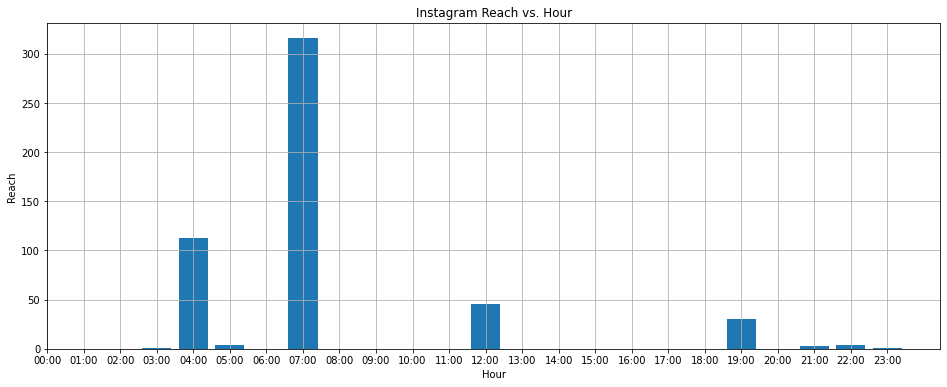

In [66]:
# Assuming df['Hour'] contains values from 0 to 23
plt.figure(figsize=(16, 6))  # Adjust width and height as needed
plt.bar(df_insta['Hour'], df_insta['Reach'])
plt.xlabel('Hour')
plt.ylabel('Reach')
plt.title('Instagram Reach vs. Hour')

# Set custom x-axis tick labels
plt.xticks(range(24), [f"{hour:02}:00" for hour in range(24)])  # Format as HH:00
# plt.xticks(range(0, 24, 2), [f"{hour:02}:00" for hour in range(0, 24, 2)])

# Set custom y-axis ticks (every 50)
plt.yticks(range(0, max(df_insta['Reach']) + 1, 50))

# Show the plot
plt.grid(True)
plt.show()


In [67]:
df_insta['Reach'].max()

316

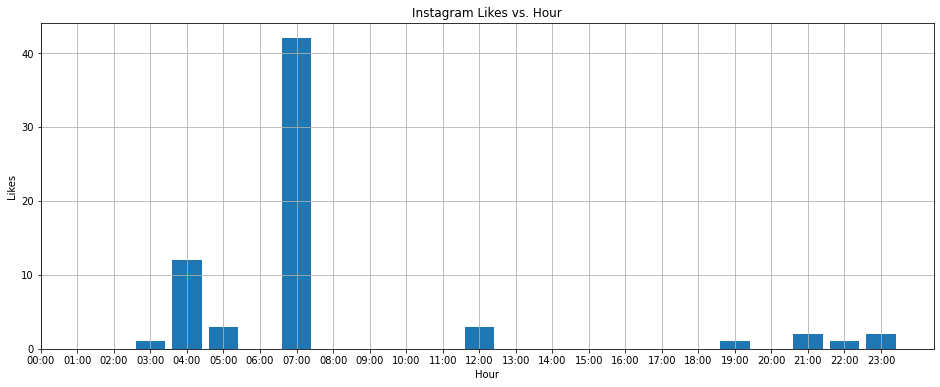

In [70]:
# Assuming df['Hour'] contains values from 0 to 23
plt.figure(figsize=(16, 6))  # Adjust width and height as needed
plt.bar(df_insta['Hour'], df_insta['Likes'])
plt.xlabel('Hour')
plt.ylabel('Likes')
plt.title('Instagram Likes vs. Hour')

# Set custom x-axis tick labels
plt.xticks(range(24), [f"{hour:02}:00" for hour in range(24)])  # Format as HH:00
# plt.xticks(range(0, 24, 2), [f"{hour:02}:00" for hour in range(0, 24, 2)])

# Set custom y-axis ticks (every 50)
plt.yticks(range(0, max(df_insta['Likes']) + 1, 10))

# Show the plot
plt.grid(True)
plt.show()

In [69]:
df_insta['Likes'].max()

42